# Home assignment #1. Kalman Filter

Imagine a robot. Robot state is described with the following parameters

1. $x$, $y$ - robot coordinates,
2. $V_x$, $V_y$ - velocities.

We can only measure the coordinates of the robot, which should be reflected in the $ H $ matrix.

In this homework assignment:
- Fill in the matrices for the Kalman filter correctly.
- For all three experiments, visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time.
- For all three experiments, visualize the dependence of each component of the gain matrix ($ K $) over time.
     - What does the dynamics of changes in its components say?
- How much does the velocity uncertainty decrease as a result of each experiment?

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def two_figs(t1, t2, x1, x2, txt1, txt2):
    fig, ax1 = plt.subplots(figsize=(10,6))
    ax1.plot(t1, x1, label=txt1)
    ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(t2, x2, label=txt2, color='red')
    ax2.legend(loc='upper right')
    plt.xlabel('time')

In [54]:
def filter(x, F, E, H, R, u, measurements):
    K_t = []
    x_t = []
    for n in range(len(measurements)):
        # prediction
        x = F @ x + u
        E = F @ E @ F.T
        # measurement update
        Z = np.array(measurements[n])[:, np.newaxis]
        S = H @ E @ H.T + R
        K = E @ H.T @ np.linalg.inv(S)
        K_t.append(K)
        x = x + K @ (Z - H @ x)
        E = (I - K @ H) @ E
        x_t.append(x)
    return np.array(x_t), np.array(K_t)
########################################

In [55]:
dt = 0.1

# initial covariance matrix: 0. for positions x and y, 1000 for the two velocities
E = np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1000, 0], [0, 0, 0, 1000]])
# next state function: 4D
F = np.array([[1, 0, dt , 0], [0, 1, 0, dt], [0, 0, 1, 0], [0, 0, 0, 1]]) 
#H = # measurement function: reflect the fact that we observe x and y but not the two velocities
H = np.array([[1, 0, 0, 0], [0, 1, 0, 0]])
# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = np.array([[0.1, 0], [0, 0.1]]) 
# 4D identity matrix
I = np.eye(4)

In [56]:
print("### First Experiment ###")
measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = np.array([4., 12.])


#x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
x = np.array([[initial_xy[0]], [initial_xy[1]], [0.], [0.]])

#u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot
u = np.array([[0.], [0.1], [0.], [0.]])

### First Experiment ###


In [57]:
X_t, K_t = filter(x, F, E, H, R, u, measurements)
X_t = X_t.reshape(X_t.shape[0], X_t.shape[1])

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

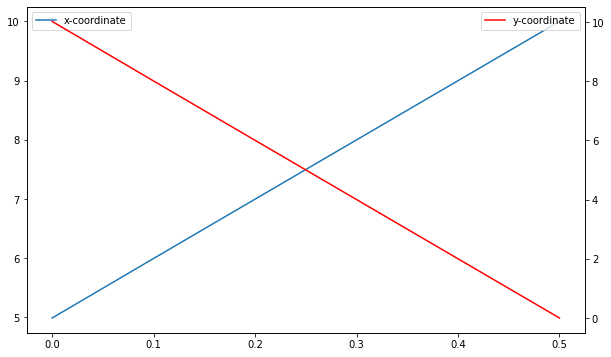

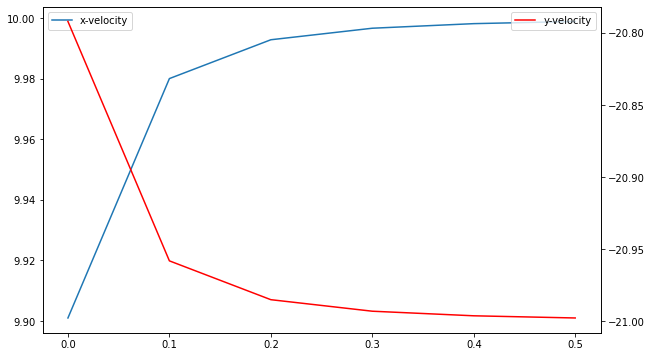

In [58]:
time_scale = np.arange(len(measurements)) * dt
two_figs(time_scale, time_scale, X_t[:, 0], X_t[:, 1], 'x-coordinate', 'y-coordinate')
two_figs(time_scale, time_scale, X_t[:, 2], X_t[:, 3], 'x-velocity', 'y-velocity')

Visualize the components of the $ K $ matrix below

## We can find that Kalman gain has two non identical components: coordinate gain Kxx=Kyy and velocity gain Kvxx=Kvyy
## We plot two curves

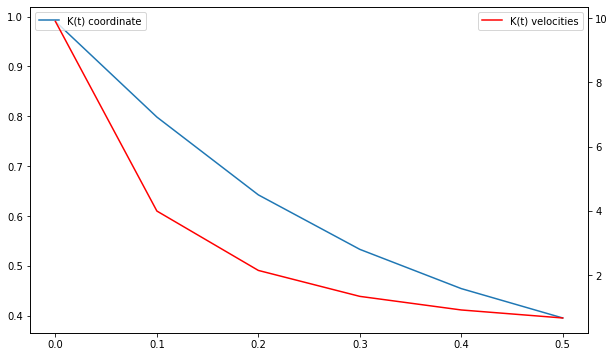

In [59]:
two_figs(time_scale, time_scale, K_t[:, 0, 0], K_t[:, -1, -1], 'K(t) coordinate', 'K(t) velocities')

In [60]:
print("### Second Experiment ###")
measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
initial_xy = [-4., 8.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Second Experiment ###


In [61]:
X_t, K_t = filter(x, F, E, H, R, u, measurements)
X_t = X_t.reshape(X_t.shape[0], X_t.shape[1])

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

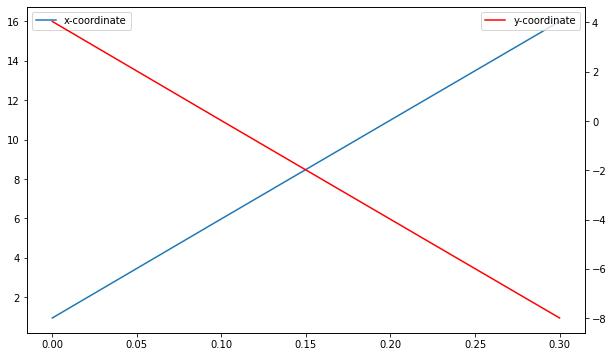

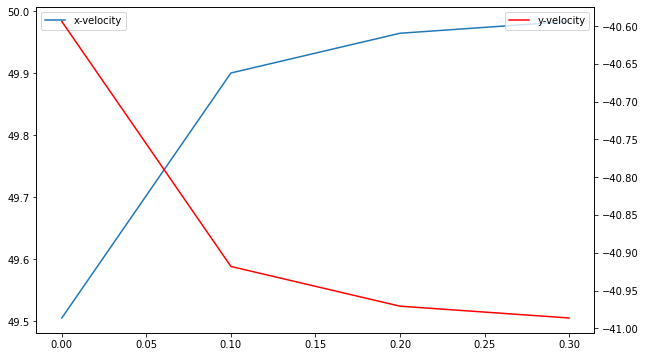

In [62]:
time_scale = np.arange(len(measurements)) * dt
two_figs(time_scale, time_scale, X_t[:, 0], X_t[:, 1], 'x-coordinate', 'y-coordinate')
two_figs(time_scale, time_scale, X_t[:, 2], X_t[:, 3], 'x-velocity', 'y-velocity')

Visualize the components of the $ K $ matrix below

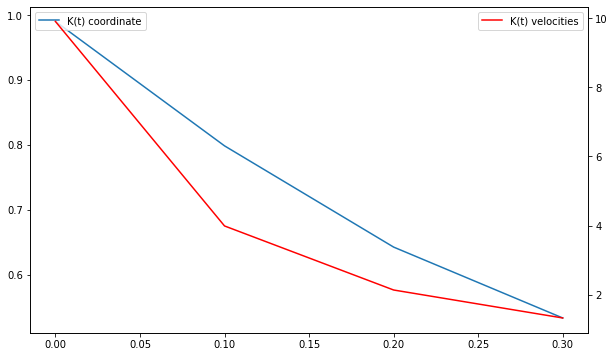

In [63]:
two_figs(time_scale, time_scale, K_t[:, 0, 0], K_t[:, -1, -1], 'K(t) coordinate', 'K(t) velocities')

In [64]:
print("### Third Experiment ###")
measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
initial_xy = [1., 19.]

dt = 0.1

x = np.matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial robot state (location and velocity)
u = np.matrix([[0.], [0.1], [0.], [0.]]) # external motion applied to the robot

### Third Experiment ###


In [65]:
X_t, K_t = filter(x, F, E, H, R, u, measurements)
X_t = X_t.reshape(X_t.shape[0], X_t.shape[1])

Visualize the dependence of $ x $, $ y $, $ V_x $, $ V_y $ over time

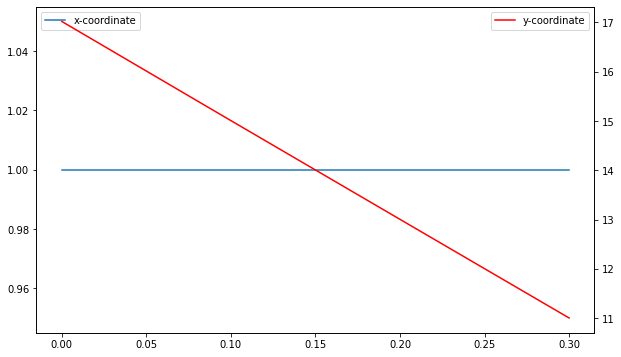

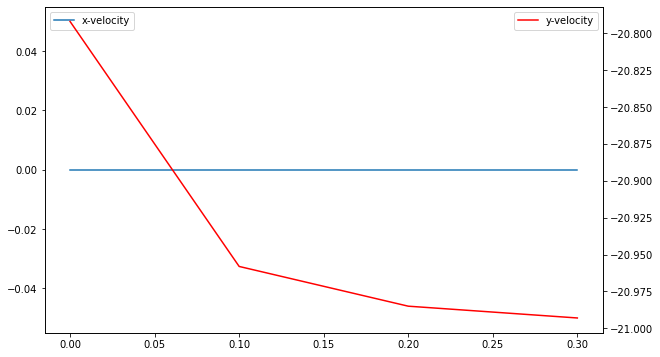

In [66]:
time_scale = np.arange(len(measurements)) * dt
two_figs(time_scale, time_scale, X_t[:, 0], X_t[:, 1], 'x-coordinate', 'y-coordinate')
two_figs(time_scale, time_scale, X_t[:, 2], X_t[:, 3], 'x-velocity', 'y-velocity')

Visualize the components of the $ K $ matrix below

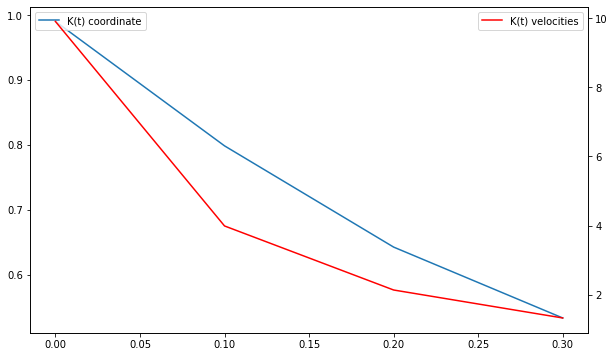

In [67]:
two_figs(time_scale, time_scale, K_t[:, 0, 0], K_t[:, -1, -1], 'K(t) coordinate', 'K(t) velocities')

## As one can observe gain decreases to a stab value (at least as in case 1 where there are 'many' data points)
## 